In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("auction+verification/data.csv")
df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


In [30]:
df.info() # в датасеті відсутні пропуски, є одна категорійна фіча  verification.result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [31]:
df["verification.result"] = df["verification.result"].map({True: 1, False: 0}) 
df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
2,0,0,2,1,59,4,0,0,154.888889
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,1,82.425000
2039,2,3,2,1,90,5,1,1,1316.983333
2040,2,3,2,1,90,5,2,0,9365.450000
2041,2,3,2,1,90,5,3,0,8474.025000


In [32]:

df_orig = df.copy()
df.describe() # звернемо увагу на наш таргет: мінімальне значення 77.9, максимальне - 44130. це досить великі значення. Потрібно їх якось масштабувати. Це ми поки що просто запам'ятаємо


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,0.128243,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,0.334442,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,1.000000,44130.520833


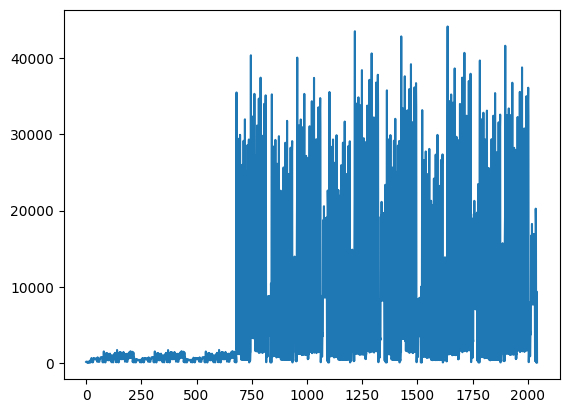

In [36]:
# розподіл даних за таргетом
trgt = "verification.time"
plt.plot(df[trgt])
# бачимо що таргет у нас - це безперервне значення, а також бачимо що третина даних є значно меншою за значенням ніж решта даних

count    2043.000000
mean       11.032399
std         2.490495
min         6.283860
25%         9.094919
50%        10.363021
75%        13.408945
max        15.429489
Name: verification.time, dtype: float64

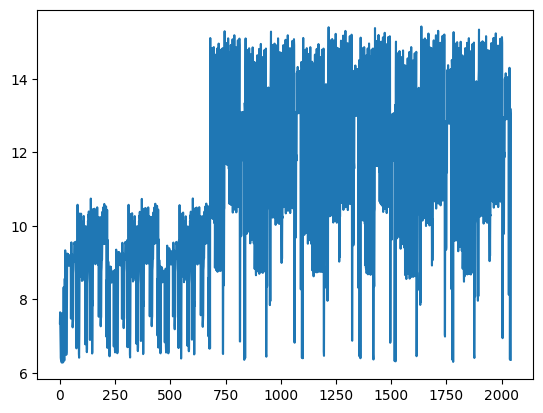

In [37]:
df[trgt] = np.log1p(df[trgt])
plt.plot(df[trgt])
df[trgt].describe()